In [1]:
import seaborn as sns

from casual_inference.dataset import create_sample_ab_result
from casual_inference.evaluator import ABTestEvaluator

In [2]:
data = create_sample_ab_result(n_variant=3, sample_size=1000000, simulated_lift=[-0.01, 0.01])
data.head()

,rand_unit,variant,metric_bin,metric_cont
0,0,3,0,0
1,1,3,0,0
2,2,3,0,1
3,3,1,0,0
4,4,1,0,0


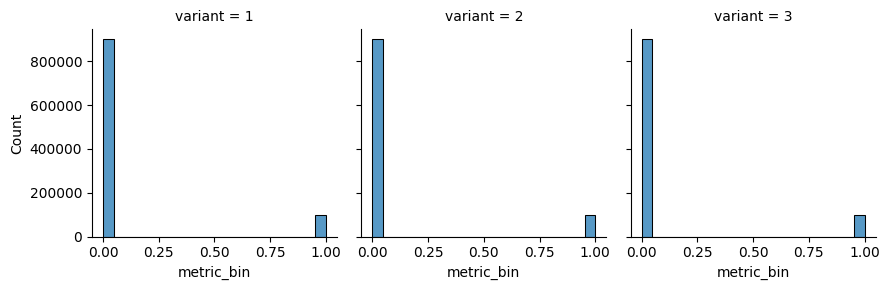

In [3]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_bin")

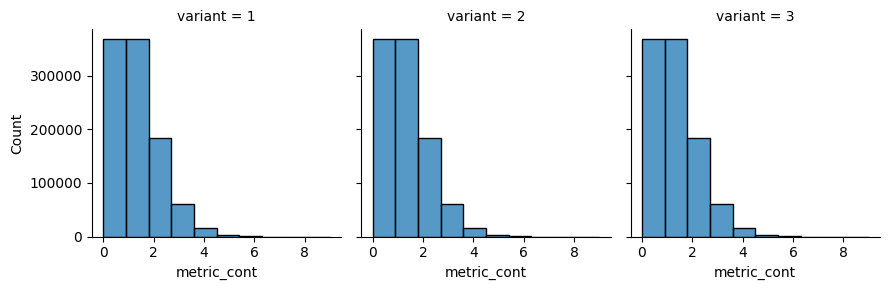

In [4]:
g = sns.FacetGrid(data=data, col="variant")
g = g.map(sns.histplot, data=data, x="metric_cont", bins=10)

In [5]:
evaluator = ABTestEvaluator()
evaluator.evaluate(
    data=data,
    unit_col="rand_unit",
    variant_col="variant",
    metrics=["metric_bin", "metric_cont"]
)

In [6]:
evaluator.summary_table()

,variant,metric,mean,var,count,std,stderr,abs_diff_mean,abs_diff_std,rel_diff_mean,rel_diff_std,t_value,dof,p_value,significance,ci_abs_diff,ci_rel_diff
0,1,metric_bin,0.100116,0.090093,333145,0.300154,0.000520,0.000000,0.000735,0.000000,0.007346,0.000000,666288.000000,1.000000e+00,unclear,"(-0.0014414250051450956, 0.0014414250051450956)","(-0.014397611409440316, 0.014397611409440316)"
1,2,metric_bin,0.099061,0.089248,333209,0.298744,0.000518,-0.001055,0.000734,-0.010534,0.007290,-1.437447,666335.992439,1.505914e-01,unclear,"(-0.0024925897518025264, 0.0003833586315216129)","(-0.024821311292033833, 0.0037533473437837746)"
2,3,metric_bin,0.100673,0.090538,333646,0.300895,0.000521,0.000557,0.000736,0.005564,0.007373,0.756733,666788.383198,4.492101e-01,unclear,"(-0.0008856574435887428, 0.0019996651151179086)","(-0.00888642374151814, 0.02001364125513248)"
3,1,metric_cont,0.996890,0.998598,333145,0.999299,0.001731,0.000000,0.002448,0.000000,0.002456,0.000000,666288.000000,1.000000e+00,unclear,"(-0.004798908546074843, 0.004798908546074843)","(-0.004813878538618657, 0.004813878538618657)"
4,2,metric_cont,0.992314,0.993768,333209,0.996879,0.001727,-0.004576,0.002445,-0.004590,0.002447,-1.871326,666347.438799,6.130036e-02,unclear,"(-0.009368982507265266, 0.00021676287603579047)","(-0.009387158653636651, 0.00020638905978048652)"
5,3,metric_cont,1.012250,1.014806,333646,1.007376,0.001744,0.015359,0.002457,0.015407,0.002484,6.250088,666760.415387,4.104680e-10,up,"(0.010542748483833176, 0.020175785460906825)","(0.010538545315511901, 0.020275813798575352)"


In [7]:
evaluator.summary_plot()

![eval_result](images/plot_abtestevaluator_result.png)